In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv('data_cleaned.csv')

In [3]:
df.head()

,Job Title,Location,Job Description,Rating,Size,Founded,Type of ownership,Industry,Sector,Revenue,...,job_simp,employee_expriece,desc_len,python,excel,sql,tableau,spark,machine learning,aws
0,Business Analyst,"Plano, TX","Hello,\r\nWe are hiring for Business System An...",5.0,Unknown,-1,Company - Public,Unknown,Unknown,Unknown / Non-Applicable,...,business analyst,na,1459,0,1,1,0,0,0,0
1,Business Systems Analyst,"Irvine, CA",-1,5.0,Unknown,-1,Unknown,Unknown,Unknown,Unknown / Non-Applicable,...,na,na,2,0,0,0,0,0,0,0
2,Business/Database Analyst,"Newark, NJ",JSR has an immediate opening for their direct ...,5.0,51 to 200 Employees,2015,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD),...,na,na,4188,0,1,1,0,0,0,1
3,Data Analyst,"New York, NY",Are you someone who loves crunching numbers an...,3.5,201 to 500 Employees,1972,Nonprofit Organization,Education & Training Services,Education,$5 to $25 million (USD),...,data analyst,na,3518,0,1,0,0,0,0,0
4,Junior Business/Data Analyst,"Washington, DC","Company Overview:\r\nThe Kenific Group, Inc. (...",2.6,51 to 200 Employees,-1,Company - Private,Business Consulting,Management & Consulting,Less than $1 million (USD),...,data analyst,junior_emp,3353,0,1,1,0,0,0,1


In [4]:
df.describe()

,Rating,Founded,hourly,employer_est,glassdoor_est,min_salary,max_salary,avg_salary,age,desc_len,python,excel,sql,tableau,spark,machine learning,aws
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,3.670515,1457.793961,0.143872,0.577265,0.422735,98.753428,138.145471,118.449449,36.476021,3984.326821,0.461812,0.490231,0.523979,0.149201,0.177620,0.296625,0.273535
std,1.275076,869.017208,0.351272,0.494433,0.494433,39.176321,58.739585,47.370053,48.582623,2167.914802,0.498983,0.500349,0.499869,0.356603,0.382532,0.457176,0.446169
min,-1.000000,-1.000000,0.000000,0.000000,0.000000,4.000000,6.000000,5.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.600000,-1.000000,0.000000,0.000000,0.000000,70.000000,98.500000,83.500000,-1.000000,2410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.900000,1971.000000,0.000000,1.000000,0.000000,90.000000,127.000000,109.000000,18.000000,4092.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.300000,2004.000000,0.000000,1.000000,1.000000,120.000000,165.500000,141.250000,50.000000,5391.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,2022.000000,1.000000,1.000000,1.000000,300.000000,520.000000,400.000000,277.000000,13226.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.columns

Index(['Job Title', 'Location', 'Job Description', 'Rating', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer_est', 'glassdoor_est', 'min_salary', 'max_salary',
       'avg_salary', 'age', 'company_txt', 'State', 'job_simp',
       'employee_expriece', 'desc_len', 'python', 'excel', 'sql', 'tableau',
       'spark', 'machine learning', 'aws'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          563 non-null    object 
 1   Location           563 non-null    object 
 2   Job Description    563 non-null    object 
 3   Rating             563 non-null    float64
 4   Size               563 non-null    object 
 5   Founded            563 non-null    int64  
 6   Type of ownership  563 non-null    object 
 7   Industry           563 non-null    object 
 8   Sector             563 non-null    object 
 9   Revenue            563 non-null    object 
 10  hourly             563 non-null    int64  
 11  employer_est       563 non-null    int64  
 12  glassdoor_est      563 non-null    int64  
 13  min_salary         563 non-null    float64
 14  max_salary         563 non-null    float64
 15  avg_salary         563 non-null    float64
 16  age                563 non

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

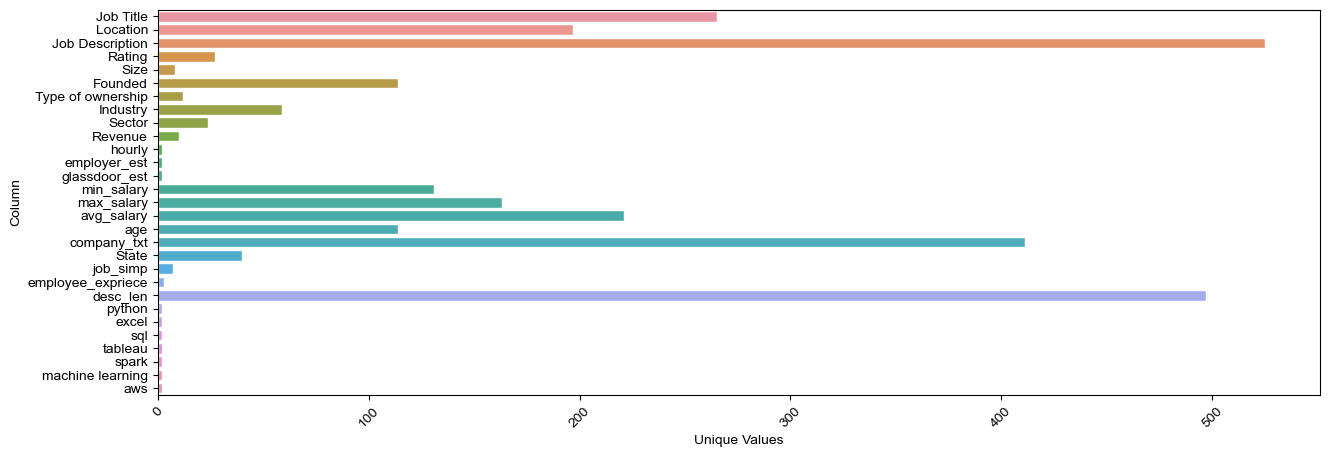

In [7]:
# Get an idea of the number of unique values
uniques = df.nunique().reset_index()
uniques.columns = ['Column','Unique Values']
fig, ax = plt.subplots(nrows=1, ncols= 1, figsize=(15,5))
sns.set_theme(style="darkgrid")
ax = sns.barplot(y='Column', x='Unique Values', data=uniques)
plt.xticks(rotation=45)

In [8]:
# Function for getting unique col counts
def get_unique_col_count(col):
    return "There are " + str(df[col].nunique()) + " unique values for " + col

There are 27 unique values for Rating


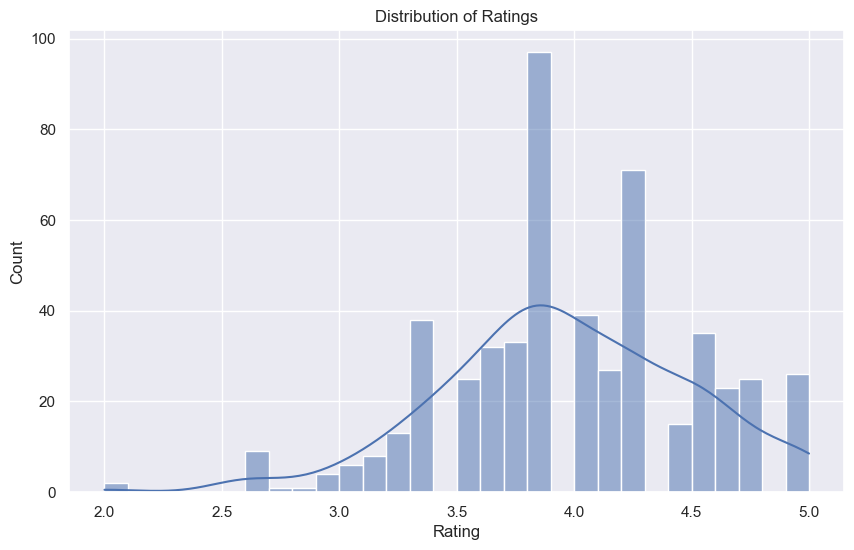

In [9]:
# Rating
# Filter out the entries with a rating of -1
filtered_ratings = df[df['Rating'] != -1]['Rating']

print(get_unique_col_count('Rating'))
plt.figure(figsize=(10, 6))
sns.histplot(filtered_ratings, kde=True, bins=30)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

There are 40 unique values for State


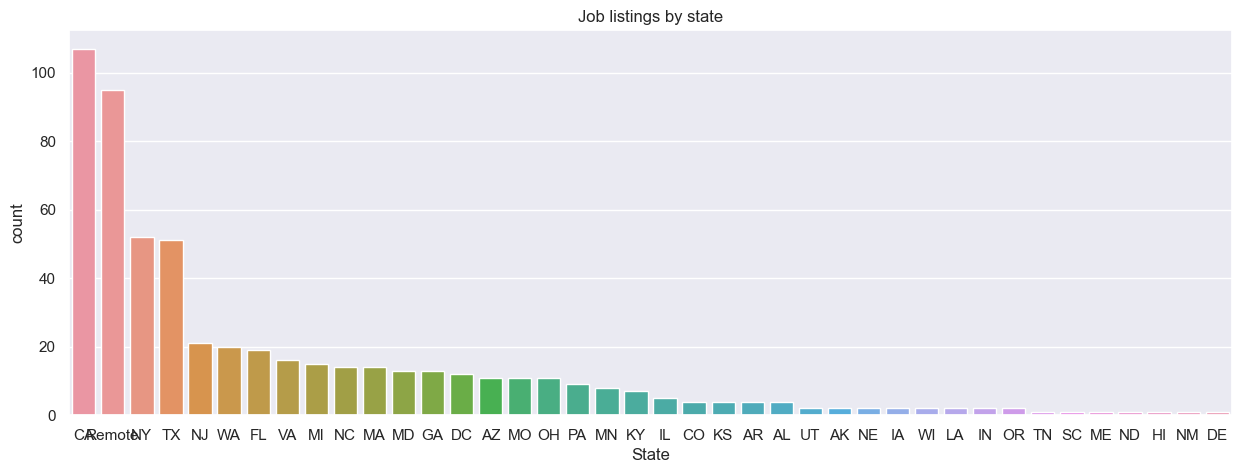

In [10]:
#State
print(get_unique_col_count('State'))

fig, ax = plt.subplots(nrows=1, ncols= 1, figsize=(15,5))
sns.countplot(x='State', data=df, order = df.State.value_counts().index);
ax.set(title='Job listings by state');

There are 8 unique values for Size


<AxesSubplot:xlabel='count', ylabel='Size'>

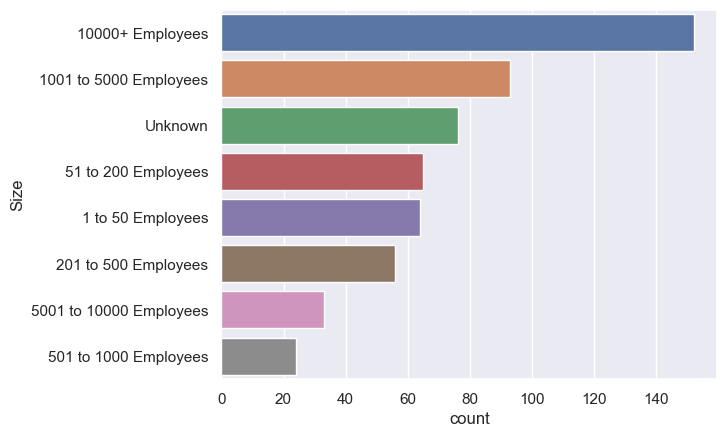

In [11]:
# Company Size

print(get_unique_col_count('Size'))
sns.countplot(y='Size',data=df,order = df['Size'].value_counts().index)

There are 12 unique values for Type of ownership


<AxesSubplot:xlabel='count', ylabel='Type of ownership'>

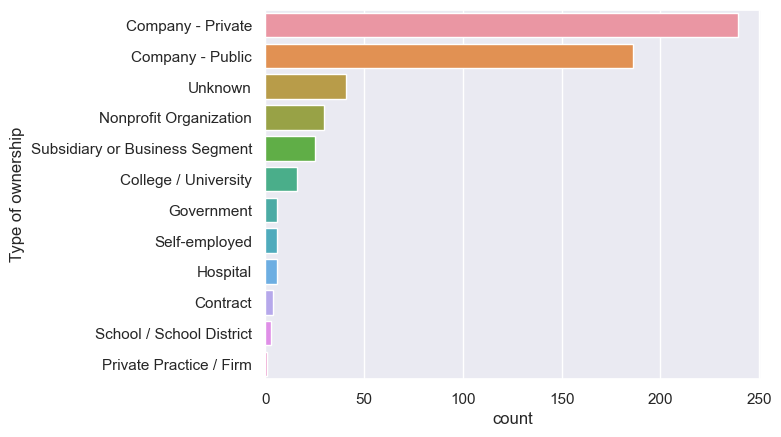

In [12]:
# Type of ownership
print(get_unique_col_count('Type of ownership'))
sns.countplot(y='Type of ownership',data=df, order= df['Type of ownership'].value_counts().index)

There are 59 unique values for Industry


<AxesSubplot:xlabel='count', ylabel='Industry'>

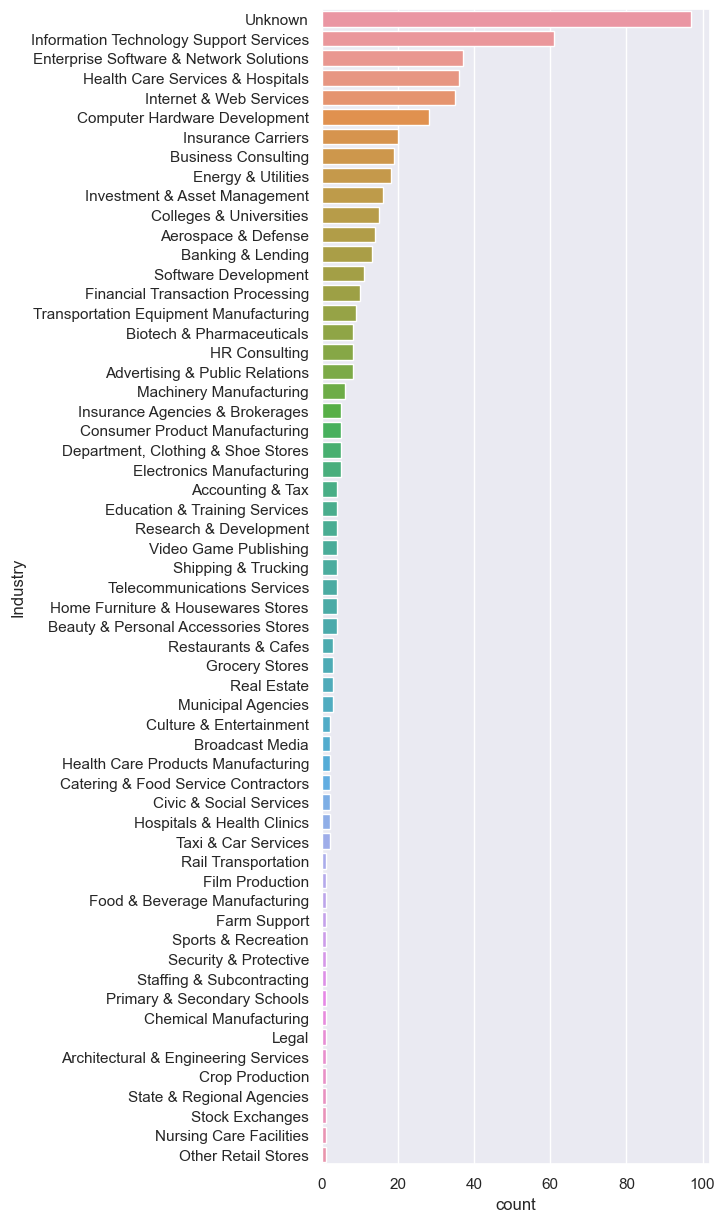

In [13]:
# Industry
print(get_unique_col_count('Industry'))
fig, ax = plt.subplots(nrows=1, ncols= 1, figsize=(5,15))
sns.countplot(y='Industry',data=df, order= df['Industry'].value_counts().index)

There are 24 unique values for Sector


<AxesSubplot:xlabel='count', ylabel='Sector'>

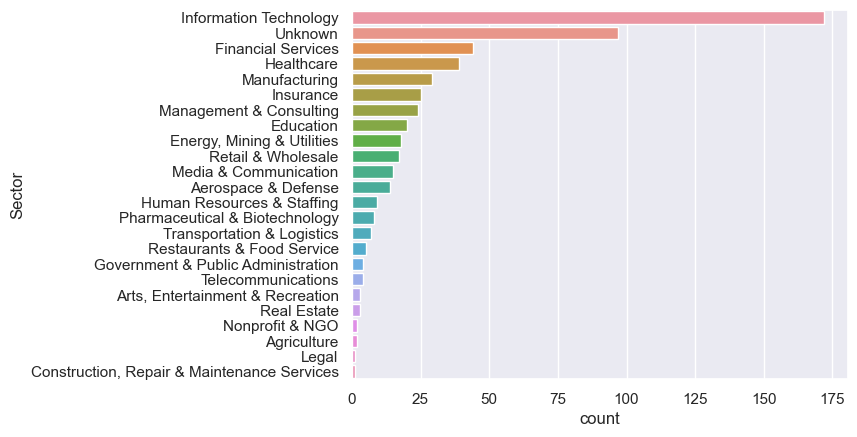

In [14]:
# Sector
print(get_unique_col_count('Sector'))
sns.countplot(y='Sector',data=df, order= df['Sector'].value_counts().index)

In [15]:
df.Revenue.value_counts()

Unknown / Non-Applicable            243
$10+ billion (USD)                   94
$1 to $5 billion (USD)               57
$5 to $25 million (USD)              39
$100 to $500 million (USD)           33
$25 to $100 million (USD)            28
$5 to $10 billion (USD)              28
$1 to $5 million (USD)               17
$500 million to $1 billion (USD)     15
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

There are 10 unique values for Revenue


<AxesSubplot:xlabel='count', ylabel='Revenue'>

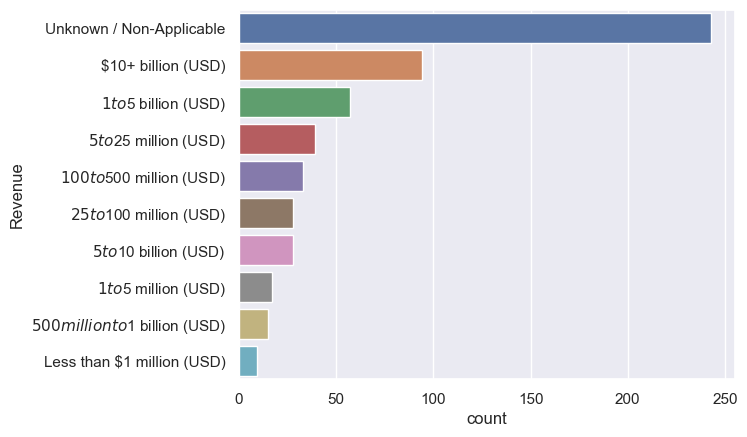

In [16]:
# Revenue
print(get_unique_col_count('Revenue'))
sns.countplot(y='Revenue',data=df, order= df['Revenue'].value_counts().index)

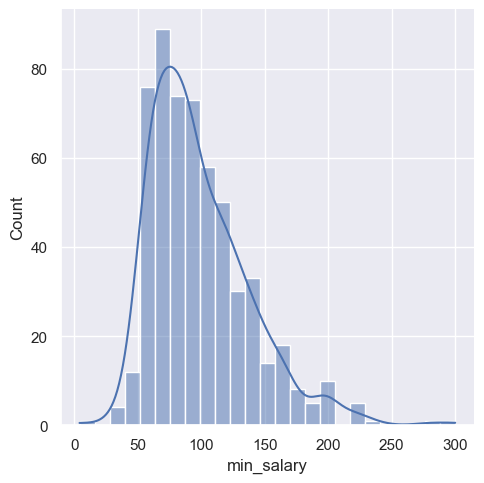

In [17]:
# min_salary
sns.displot(data=df['min_salary'], kde=True)

There are 131 unique values for min_salary
There are 221 unique values for avg_salary
There are 163 unique values for max_salary


[Text(0.5, 1.0, 'Max Salary')]

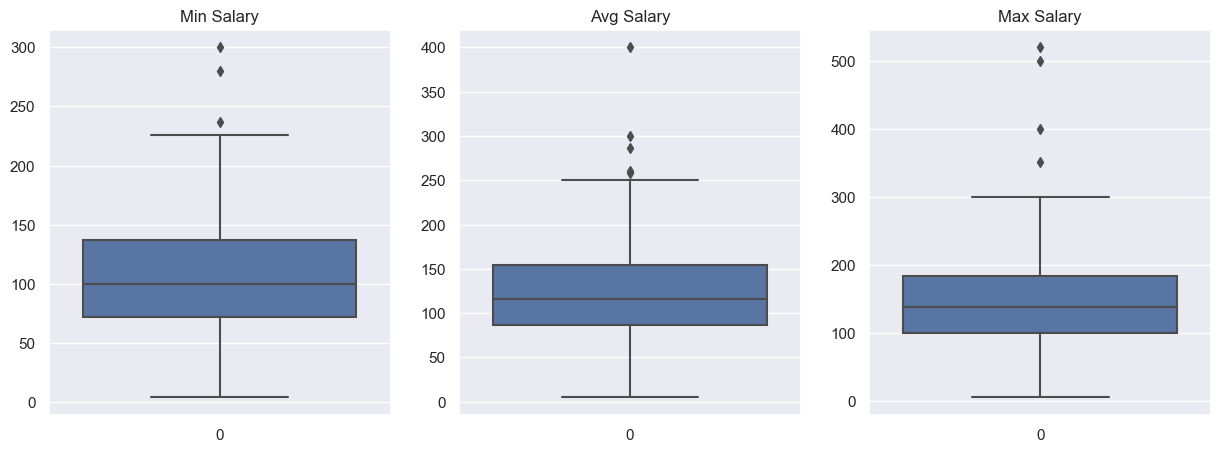

In [18]:
# min_salary, avg_salary and max_salary
print(get_unique_col_count('min_salary'))
print(get_unique_col_count('avg_salary'))
print(get_unique_col_count('max_salary'))

fig, ax = plt.subplots(nrows=1, ncols= 3, figsize=(15,5))

sns.boxplot(data=df['min_salary'].unique(), ax=ax[0], orient="v")
sns.boxplot(data=df['avg_salary'].unique(), ax=ax[1], orient="v")
sns.boxplot(data=df['max_salary'].unique(), ax=ax[2], orient="v")

ax[0].set(title='Min Salary')
ax[1].set(title='Avg Salary')
ax[2].set(title='Max Salary')

There are 114 unique values for age


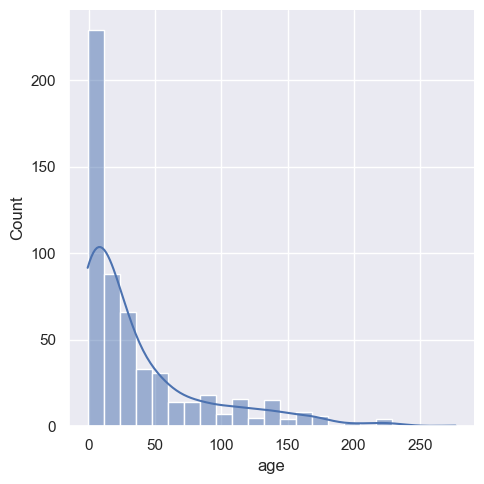

In [19]:
# company_age
print(get_unique_col_count('age'))
sns.displot(data=df['age'], kde=True)

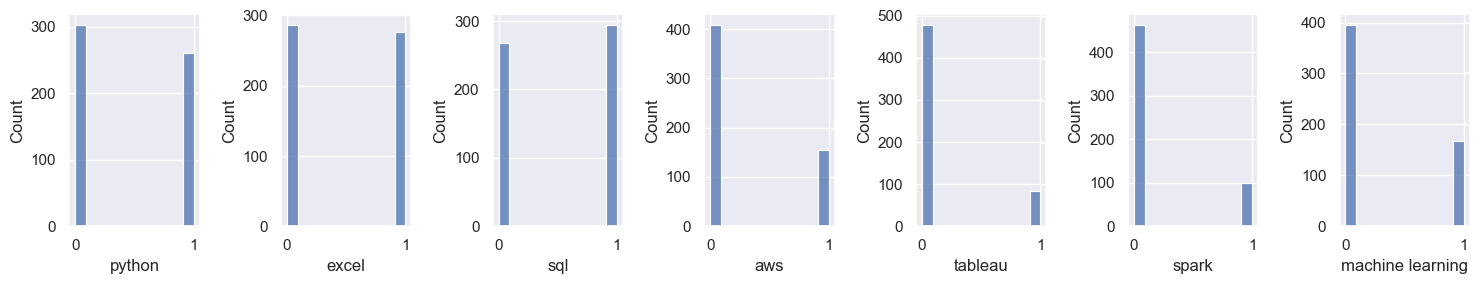

In [20]:
#value count of python, excel, sql, spark, aws, tableau, machine learning
fig, ax = plt.subplots(nrows=1, ncols= 7, figsize=(15,3))
sns.histplot(data=df['python'], ax=ax[0])
sns.histplot(data=df['excel'], ax=ax[1])
sns.histplot(data=df['sql'], ax=ax[2])
sns.histplot(data=df['aws'], ax=ax[3])
sns.histplot(data=df['tableau'], ax=ax[4])
sns.histplot(data=df['spark'], ax=ax[5])
sns.histplot(data=df['machine learning'], ax=ax[6])
fig.tight_layout()

There are 7 unique values for job_simp


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'business analyst'),
  Text(1, 0, 'na'),
  Text(2, 0, 'data analyst'),
  Text(3, 0, 'data engineer'),
  Text(4, 0, 'architect'),
  Text(5, 0, 'data scientist'),
  Text(6, 0, 'mle')])

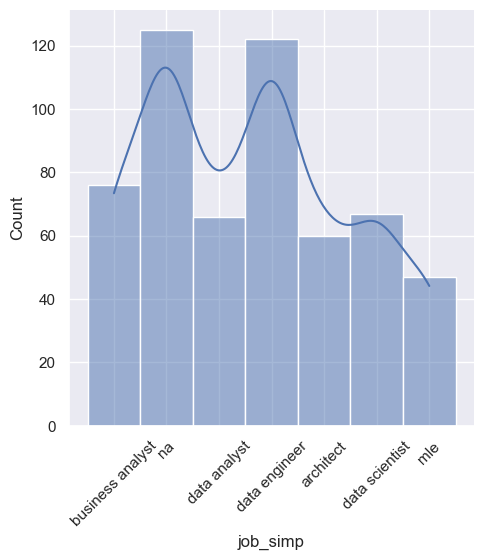

In [21]:
# job_simp
print(get_unique_col_count('job_simp'))
sns.displot(data=df['job_simp'], kde=True)
plt.xticks(rotation=45)

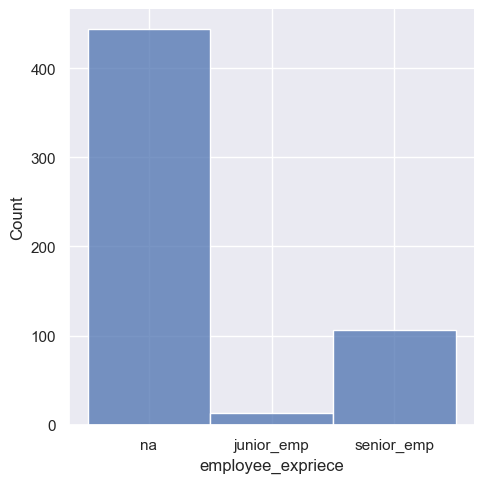

In [22]:
# employee_expriece
sns.displot(df['employee_expriece'])

In [23]:
# Look at the correlations between features
df.corr()

,Rating,Founded,hourly,employer_est,glassdoor_est,min_salary,max_salary,avg_salary,age,desc_len,python,excel,sql,tableau,spark,machine learning,aws
Rating,1.000000,0.294366,-0.203448,-0.073149,0.073149,-0.017322,0.029072,0.010862,0.130390,0.065754,-0.059384,0.006520,-0.046069,-0.002830,-0.049072,0.000684,-0.014886
Founded,0.294366,1.000000,-0.222103,-0.100880,0.100880,0.015511,0.017623,0.017340,0.414260,0.395816,0.195335,0.078755,0.095084,0.102620,0.069893,0.148914,0.086826
hourly,-0.203448,-0.222103,1.000000,0.350805,-0.350805,0.101002,-0.092263,-0.015438,-0.218389,-0.372524,-0.105645,-0.098290,-0.024749,-0.072235,0.034598,-0.155414,-0.115307
employer_est,-0.073149,-0.100880,0.350805,1.000000,-1.000000,0.396961,0.332900,0.370550,-0.166871,-0.087615,0.049845,-0.095841,0.098682,-0.055407,0.171914,-0.018917,0.033080
glassdoor_est,0.073149,0.100880,-0.350805,-1.000000,1.000000,-0.396961,-0.332900,-0.370550,0.166871,0.087615,-0.049845,0.095841,-0.098682,0.055407,-0.171914,0.018917,-0.033080
min_salary,-0.017322,0.015511,0.101002,0.396961,-0.396961,1.000000,0.867061,0.951098,-0.123848,0.034100,0.133598,-0.131597,-0.025769,-0.116238,0.281803,0.172938,0.100590
max_salary,0.029072,0.017623,-0.092263,0.332900,-0.332900,0.867061,1.000000,0.978549,-0.071262,0.066954,0.133021,-0.168461,-0.069902,-0.140303,0.260341,0.207857,0.144721
avg_salary,0.010862,0.017340,-0.015438,0.370550,-0.370550,0.951098,0.978549,1.000000,-0.095396,0.055613,0.137719,-0.158864,-0.053996,-0.135055,0.277943,0.200385,0.131323
age,0.130390,0.414260,-0.218389,-0.166871,0.166871,-0.123848,-0.071262,-0.095396,1.000000,0.308215,0.056315,0.083054,0.083350,0.022186,-0.065547,0.029922,-0.022189
desc_len,0.065754,0.395816,-0.372524,-0.087615,0.087615,0.034100,0.066954,0.055613,0.308215,1.000000,0.210480,0.207475,0.231796,0.129199,0.110011,0.186061,0.252921


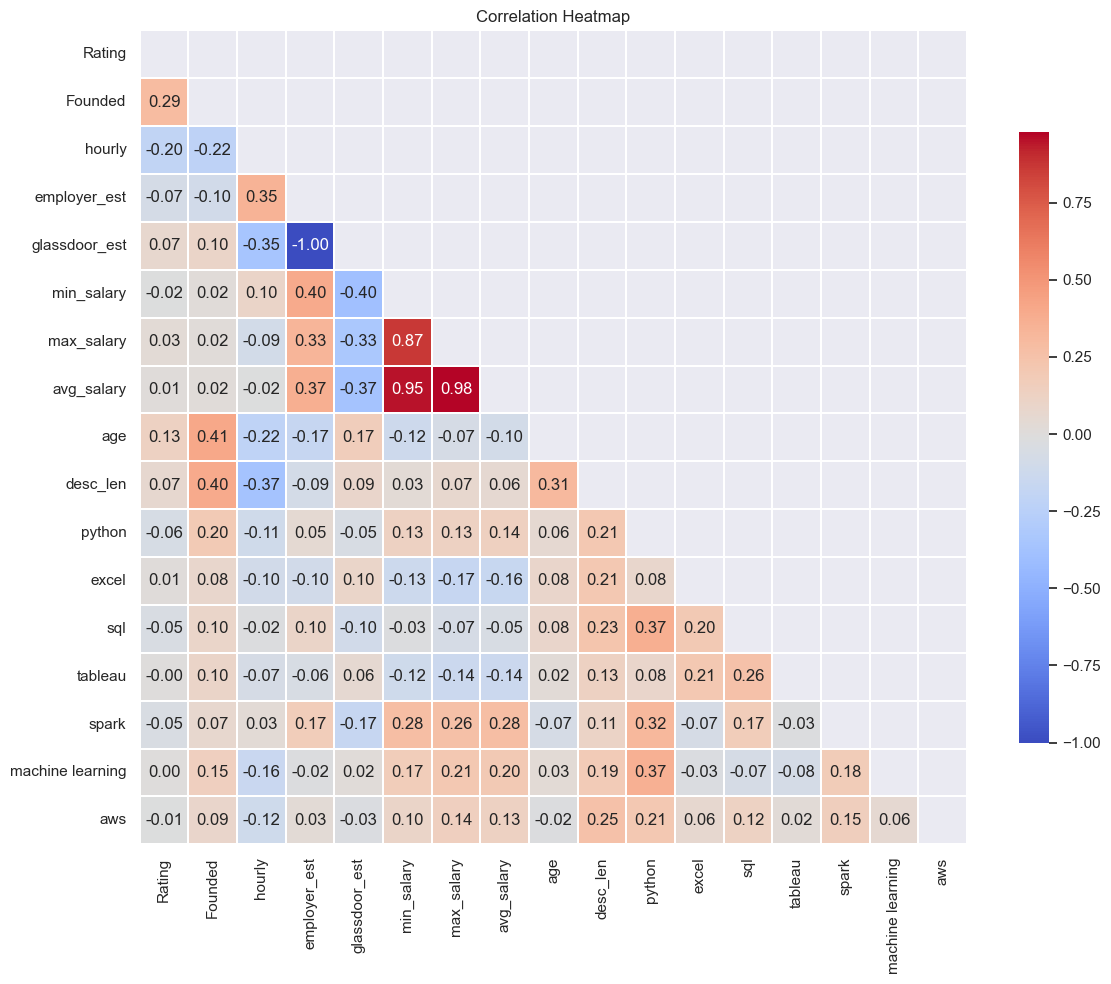

In [24]:
# Put the correlations into a heatmap to better visualize
# Mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Setting up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, ax=ax, annot=True, linewidths=0.05, fmt= '.2f', cmap="coolwarm",
            cbar_kws={"shrink": .75})

# Title and labels
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

C:\Users\fansy_skkv99a\AppData\Local\Temp\ipykernel_25332\948451204.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = df.skew()


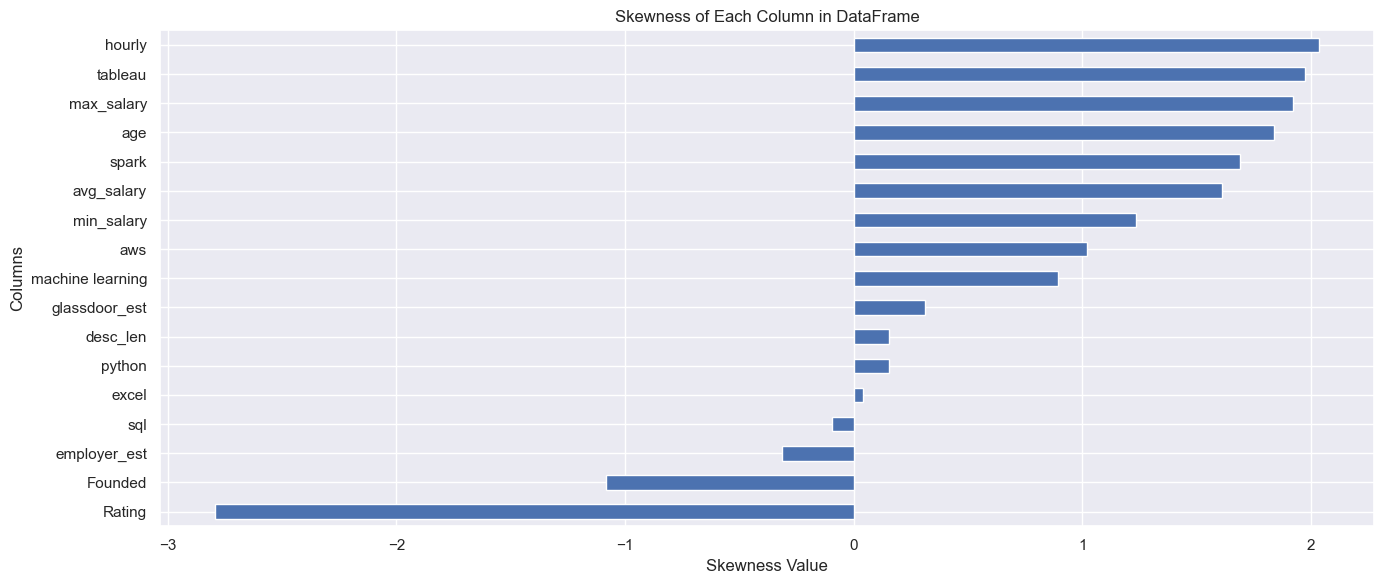

Rating       -2.791540
Founded      -1.082490
hourly        2.034875
min_salary    1.237249
max_salary    1.923357
avg_salary    1.609153
age           1.838460
tableau       1.974464
spark         1.691514
aws           1.018774
dtype: float64

In [25]:
# How skewed is each column
skewness = df.skew()

# 1. Visualization
plt.figure(figsize=(14, 6))
skewness.sort_values().plot(kind='barh')
plt.title("Skewness of Each Column in DataFrame")
plt.xlabel("Skewness Value")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()

# 2. Highlight Extremes
high_skew = skewness[skewness.abs() > 1]
high_skew

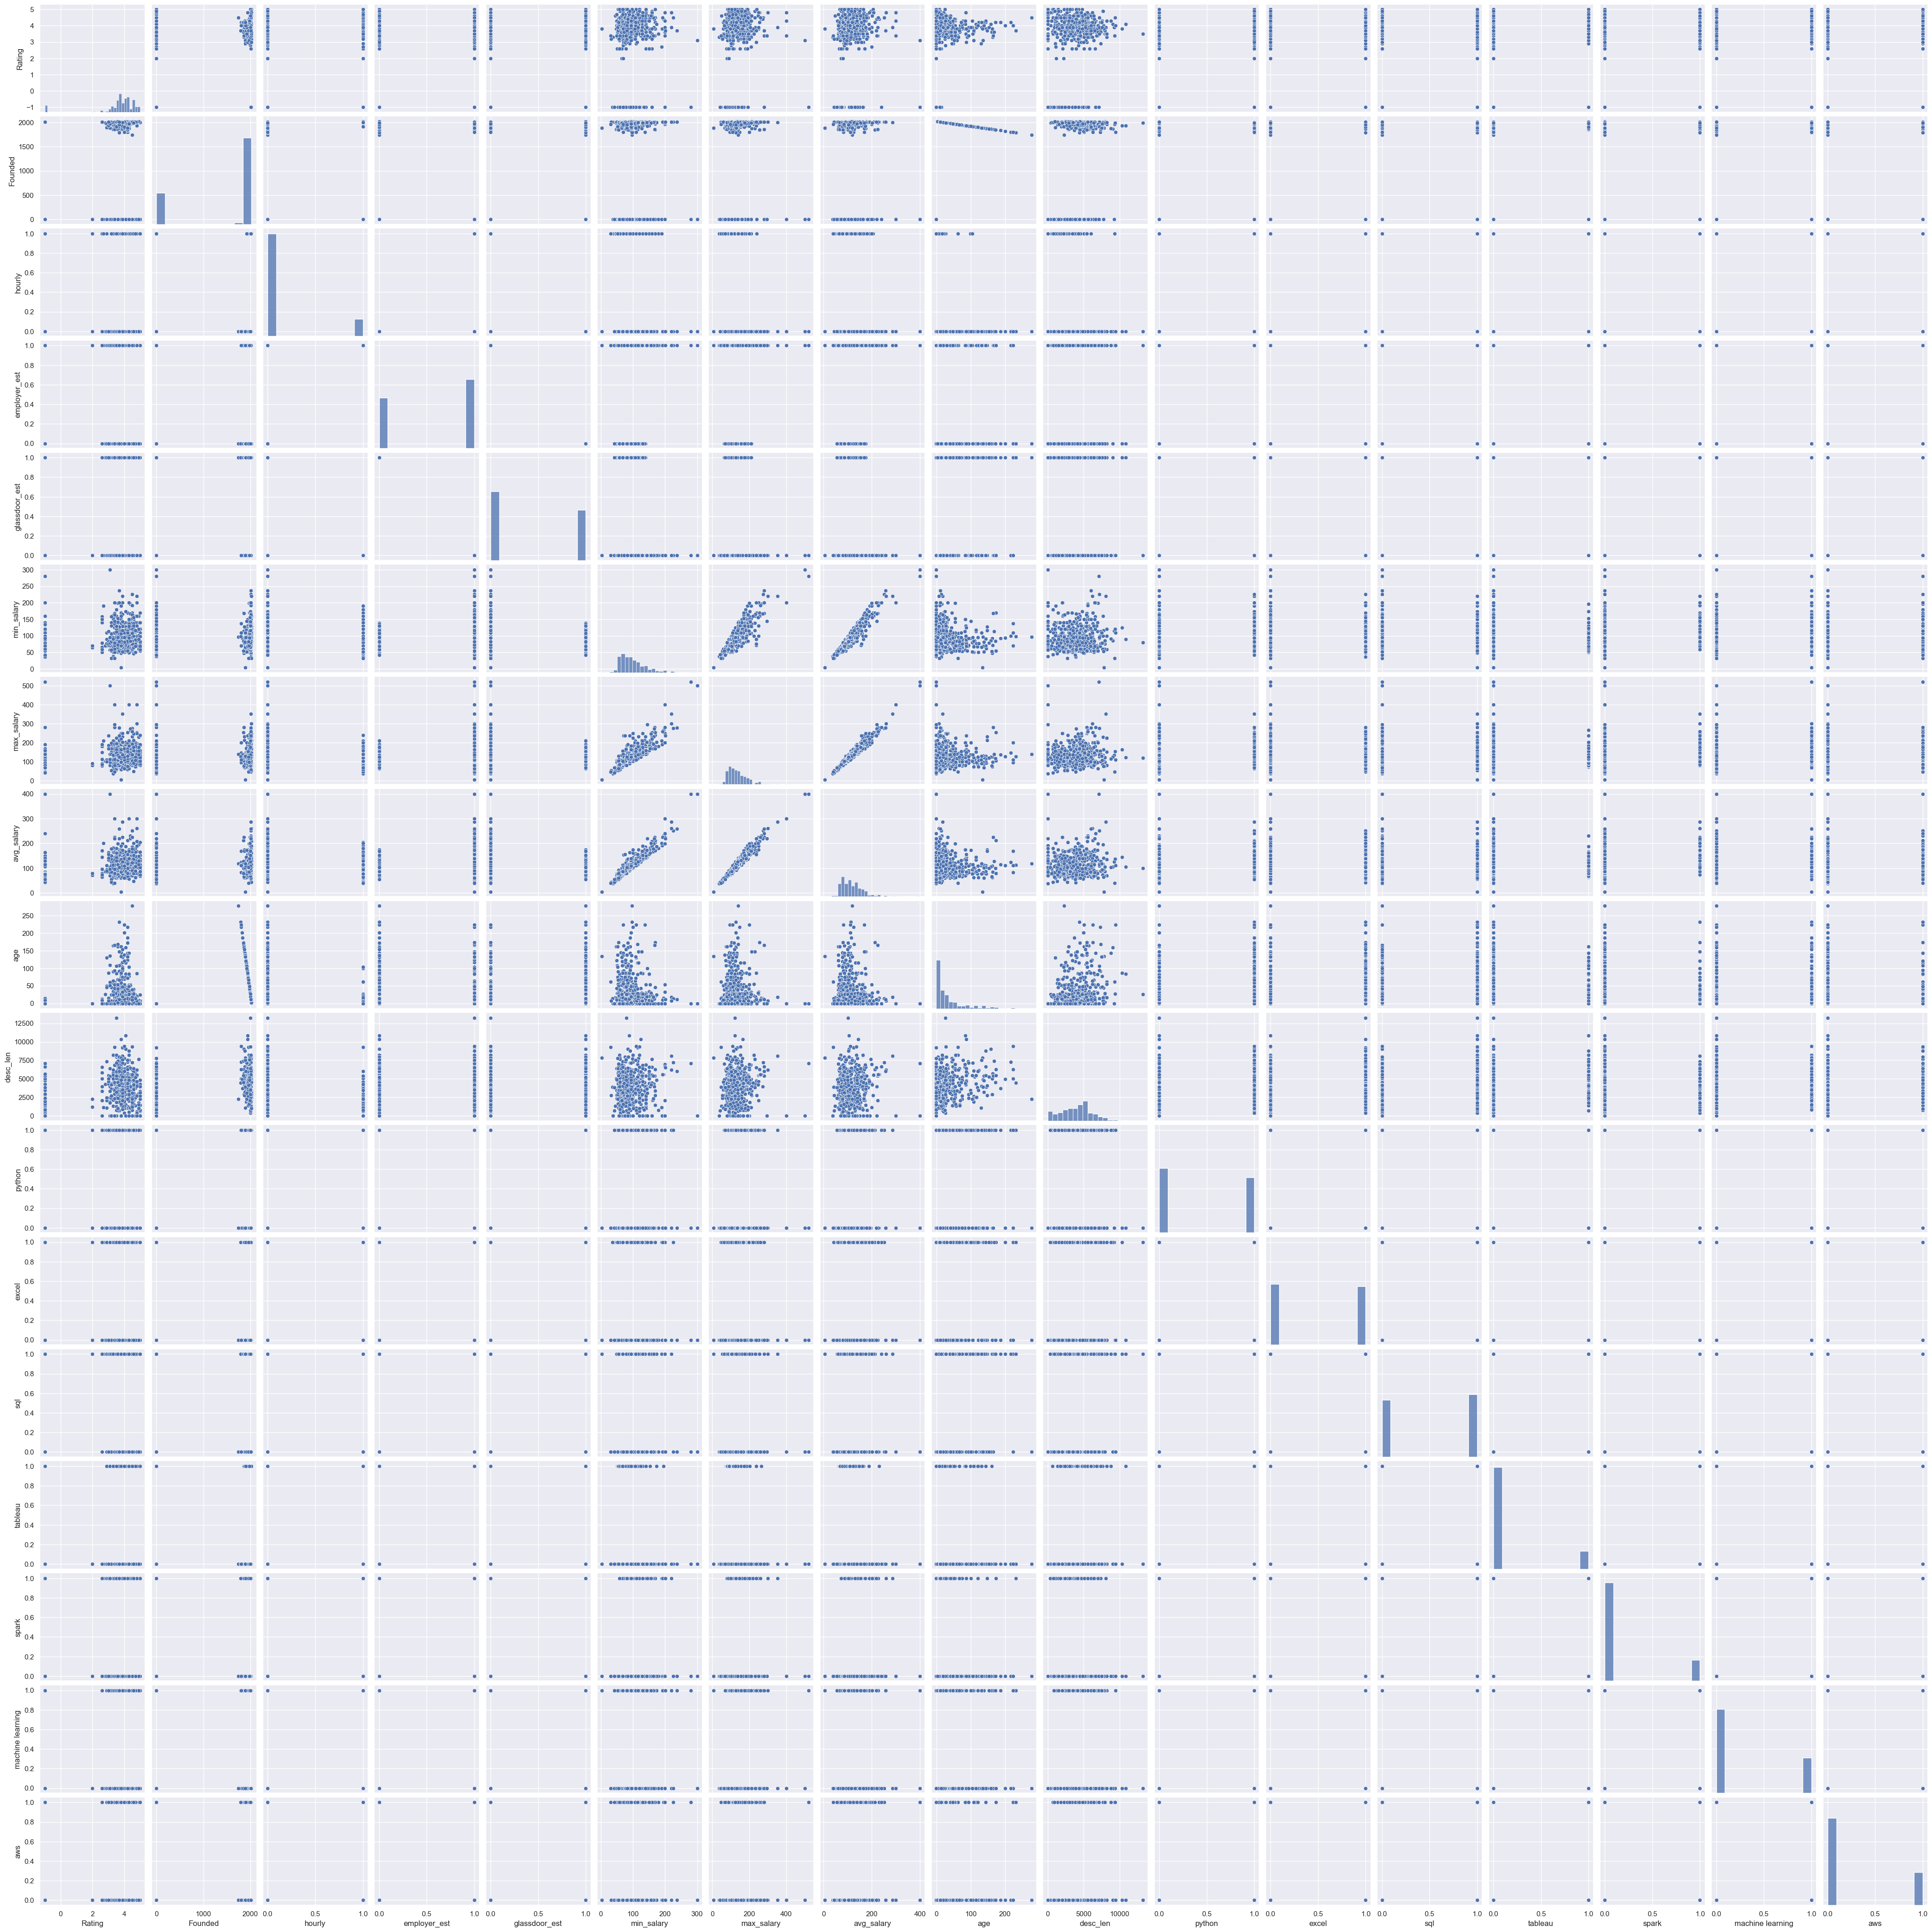

In [26]:
# Look at a pairplot and see if anything stands out
sns.pairplot(data=df)

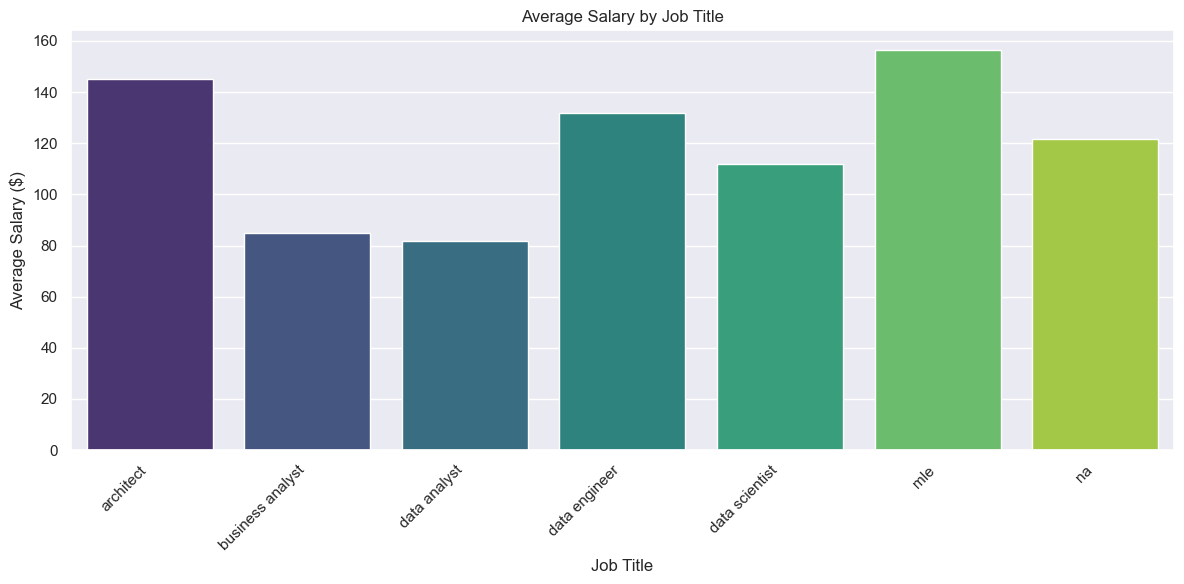

In [27]:
# Pivot table to get average salary by job title
pivot_df = pd.pivot_table(df, index='job_simp', values='avg_salary').reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='job_simp', y='avg_salary', data=pivot_df, palette='viridis')
plt.title('Average Salary by Job Title')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Salary ($)')
plt.xlabel('Job Title')
plt.tight_layout()
plt.show()

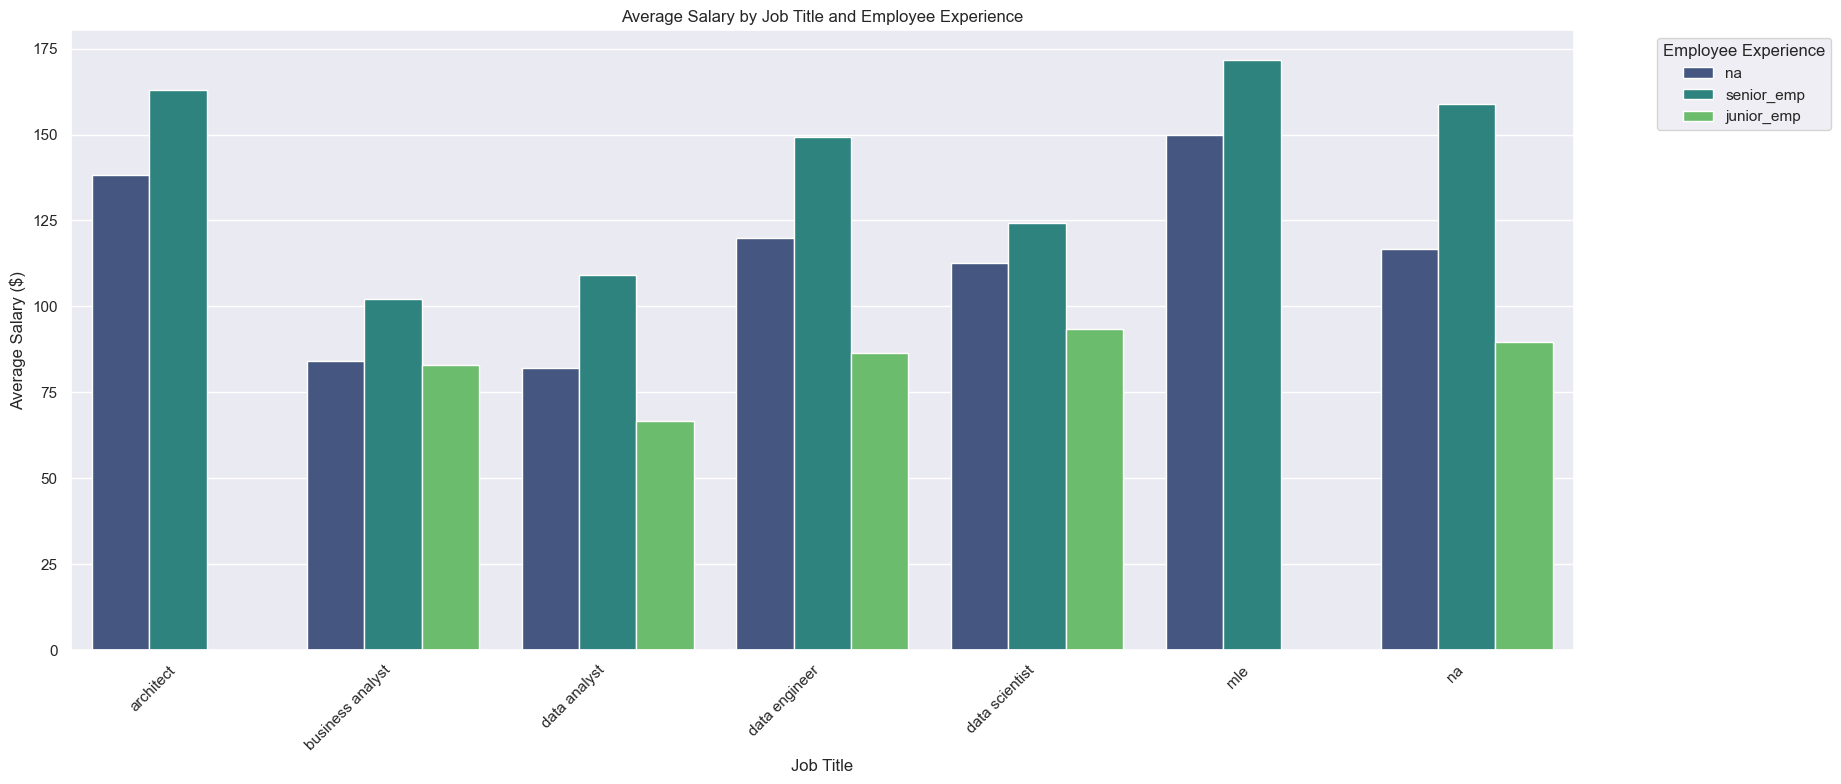

In [28]:
# Pivot table to get average salary by job title and experience level
pivot_df_multi = pd.pivot_table(df, index=['job_simp', 'employee_expriece'], values='avg_salary').reset_index()

# Plotting grouped bar plot
plt.figure(figsize=(16, 8))
sns.barplot(x='job_simp', y='avg_salary', hue='employee_expriece', data=pivot_df_multi, palette='viridis')
plt.title('Average Salary by Job Title and Employee Experience')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Salary ($)')
plt.xlabel('Job Title')
plt.tight_layout()
plt.legend(title='Employee Experience', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


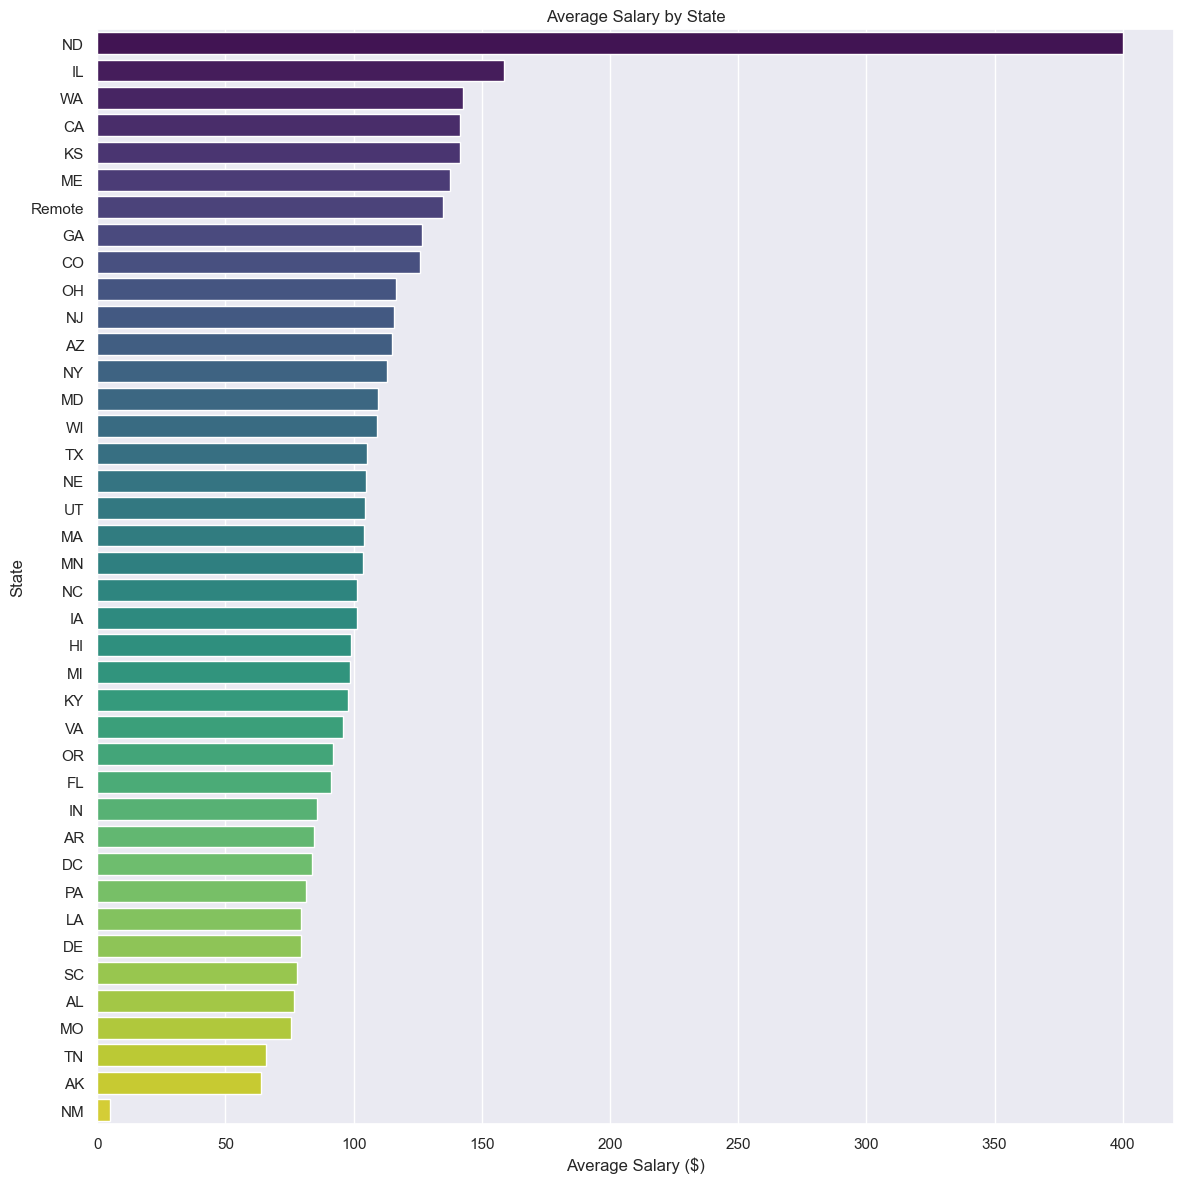

In [29]:
# Pivot table to get average salary by state
pivot_df_state = pd.pivot_table(df, index='State', values='avg_salary').sort_values('avg_salary', ascending=False).reset_index()

# Plotting horizontal bar plot
plt.figure(figsize=(12, 12))
sns.barplot(x='avg_salary', y='State', data=pivot_df_state, palette='viridis')
plt.title('Average Salary by State')
plt.xlabel('Average Salary ($)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


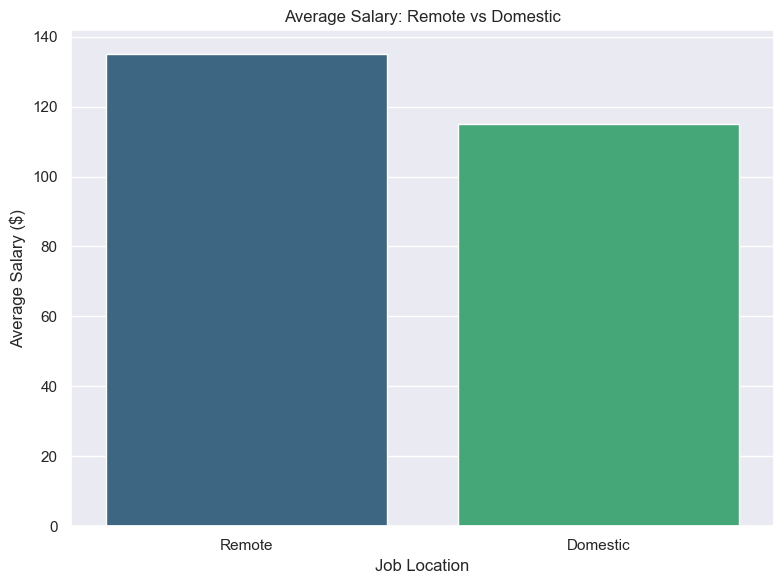

In [30]:
# Filtering data for "Remote" and calculating average salary
remote_salary = df[df['State'] == 'Remote']['avg_salary'].mean()

# Calculating average salary for all other states
domestic_salary = df[df['State'] != 'Remote']['avg_salary'].mean()

# Preparing data for plotting
plot_data = pd.DataFrame({
    'Category': ['Remote', 'Domestic'],
    'Average Salary': [remote_salary, domestic_salary]
})

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Average Salary', data=plot_data, palette='viridis')
plt.title('Average Salary: Remote vs Domestic')
plt.ylabel('Average Salary ($)')
plt.xlabel('Job Location')
plt.tight_layout()
plt.show()

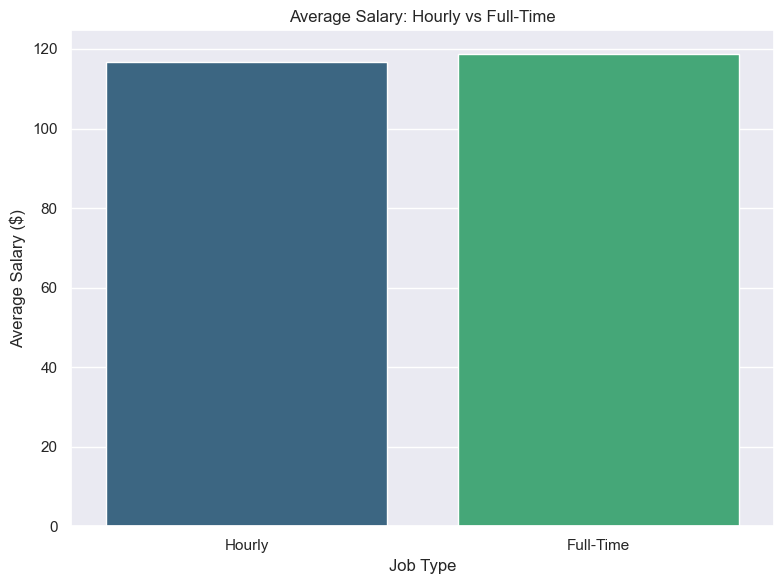

In [31]:
# Calculating average salary for hourly positions
hourly_salary = df[df['hourly'] == 1]['avg_salary'].mean()

# Calculating average salary for full-time positions
fulltime_salary = df[df['hourly'] == 0]['avg_salary'].mean()

# Preparing data for plotting
plot_data = pd.DataFrame({
    'Job Type': ['Hourly', 'Full-Time'],
    'Average Salary': [hourly_salary, fulltime_salary]
})

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Job Type', y='Average Salary', data=plot_data, palette='viridis')
plt.title('Average Salary: Hourly vs Full-Time')
plt.ylabel('Average Salary ($)')
plt.xlabel('Job Type')
plt.tight_layout()
plt.show()

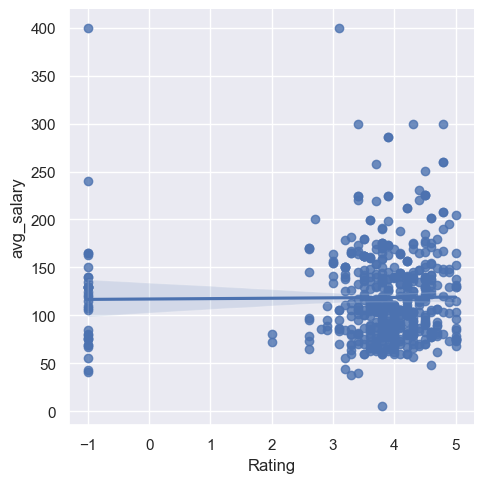

In [32]:
sns.lmplot(x='Rating',y='avg_salary',data=df)

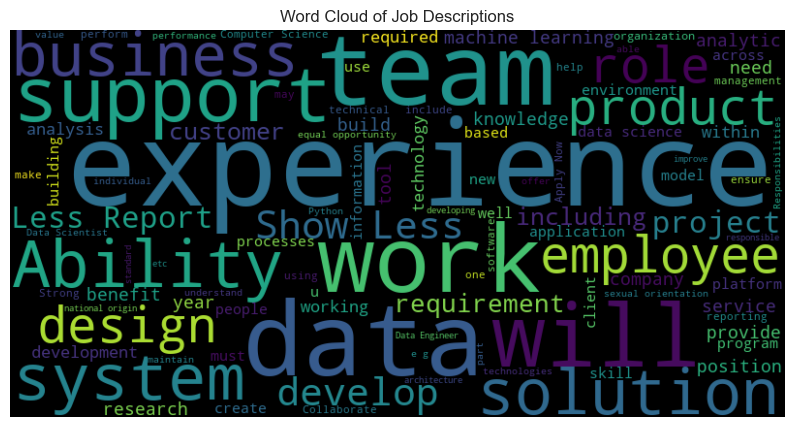

<Figure size 640x480 with 0 Axes>

In [33]:
#WordCloud
# Concatenate all job descriptions
text = " ".join(desc for desc in df['Job Description'] if desc != "-1")

# Create and configure word cloud object
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black", max_words=100, width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Job Descriptions")
plt.show()
plt.savefig('wordcloud.png')